# Export training statistics plots

## Module imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Trained model names

In [40]:
MODELS = ['resnet50_scratch', 'mobilenet_scratch', 'mobilenet_separable', 'mobilenet_transfer', 'mobilenet_transfer_single']

## Overall accuracy

In [41]:
acc_df = pd.DataFrame()
for model in MODELS:
    model_df = pd.read_csv(f'{model}_acc.csv', header=None)
    model_df.columns = ['Overall Accuracy']
    model_df['Epoch'] = 1 + model_df.index
    model_df['Model'] = model
    acc_df = pd.concat((acc_df, model_df))

# acc_df.set_index(['Model', 'Epoch'], inplace=True)
acc_df.to_csv('train_acc.csv')

### With `mobilenet_transfer_single`

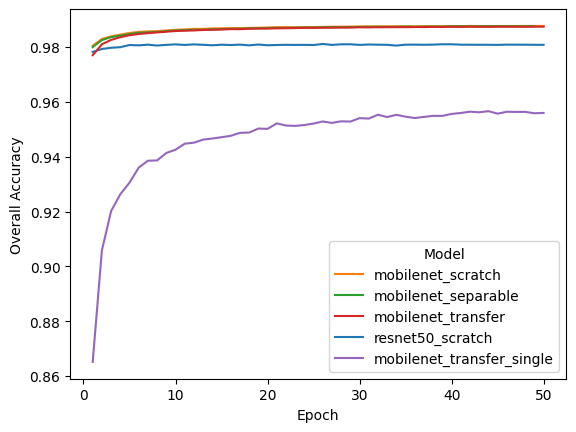

In [42]:
sns.lineplot(acc_df, y='Overall Accuracy', x='Epoch', hue='Model')

# get max accuracy for each model
max_acc = acc_df.groupby('Model')['Overall Accuracy'].max().sort_values(ascending=False)
handles, labels = plt.gca().get_legend_handles_labels()

# reorder legend by max accuracy
order = [labels.index(model) for model in max_acc.index if model in labels]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Model')

### Without `mobilenet_transfer_single`

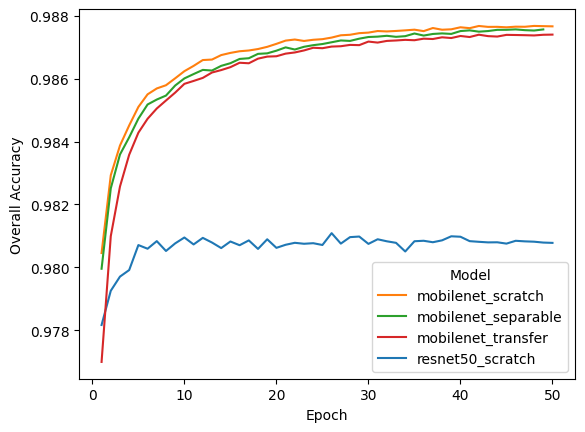

In [43]:
sns.lineplot(acc_df[acc_df['Model'] != 'mobilenet_transfer_single'], y='Overall Accuracy', x='Epoch', hue='Model')

# get max accuracy for each model
max_acc = acc_df.groupby('Model')['Overall Accuracy'].max().sort_values(ascending=False)
handles, labels = plt.gca().get_legend_handles_labels()

# reorder legend by max accuracy
order = [labels.index(model) for model in max_acc.index if model in labels]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Model')

## Mean IoU

In [46]:
miou_df = pd.DataFrame()
for model in MODELS:
    model_df = pd.read_csv(f'{model}_miou.csv', header=None)
    model_df.columns = ['mIoU']
    model_df['Epoch'] = 1 + model_df.index
    model_df['Model'] = model
    miou_df = pd.concat((miou_df, model_df))

# miou_df.set_index(['Model', 'Epoch'], inplace=True)
miou_df.to_csv('train_miou.csv')

### With `mobilenet_transfer_single`

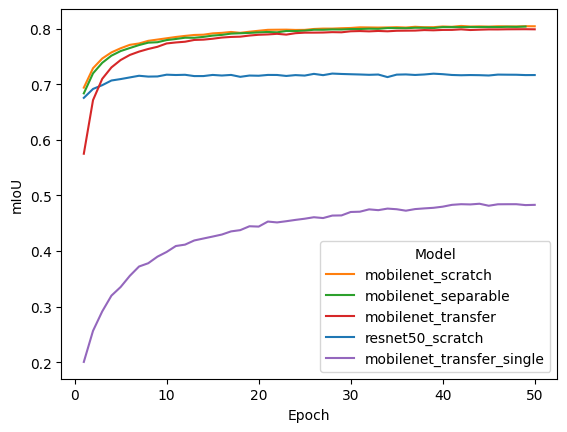

In [ ]:
sns.lineplot(miou_df, y='mIoU', x='Epoch', hue='Model')

# get max mIoU for each model
max_miou = miou_df.groupby('Model')['mIoU'].max().sort_values(ascending=False)
handles, labels = plt.gca().get_legend_handles_labels()

# reorder legend by max mIoU
order = [labels.index(model) for model in max_miou.index if model in labels]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Model')

### Without `mobilenet_transfer_single`

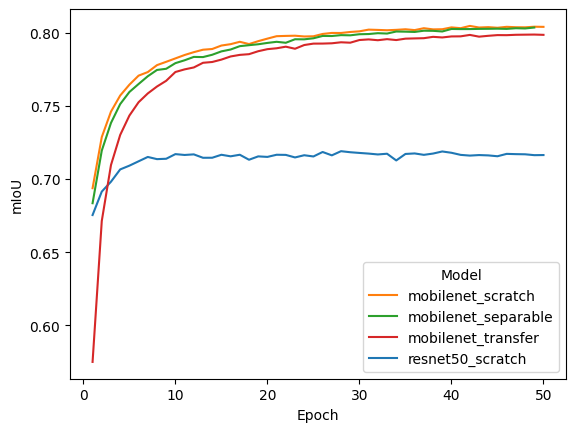

In [ ]:
sns.lineplot(miou_df[miou_df['Model'] != 'mobilenet_transfer_single'], y='mIoU', x='Epoch', hue='Model')

# get max mIoU for each model
max_miou = miou_df.groupby('Model')['mIoU'].max().sort_values(ascending=False)
handles, labels = plt.gca().get_legend_handles_labels()

# reorder legend by max mIoU
order = [labels.index(model) for model in max_miou.index if model in labels]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Model')

## Training loss

In [52]:
loss_df = pd.DataFrame()
for model in MODELS:
    model_df = pd.read_csv(f'{model}_loss.csv', header=None)
    model_df.columns = ['Loss']
    model_df['Epoch'] = model_df.index / len(model_df.index) * 50 # 50 epochs
    model_df['Model'] = model
    loss_df = pd.concat((loss_df, model_df))

# loss_df.set_index(['Model', 'Epoch'], inplace=True)
loss_df.to_csv('train_loss.csv')

<Axes: xlabel='Epoch', ylabel='Loss'>

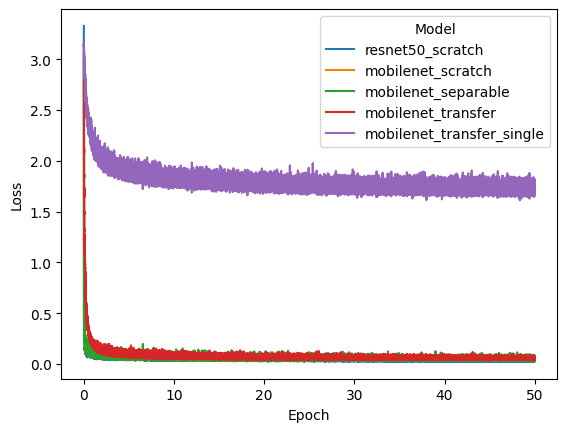

In [56]:
sns.lineplot(loss_df, y='Loss', x='Epoch', hue='Model')